# Testing the models using FID (Frechet Inception Distance)

In [39]:
import sys
sys.path.append("../")
from BAMVAE.FID import FrechIncDist

import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load images and compute the FID

The home-made package allowes to compute FID between generated images and the original MNIST images.

rechet inception distance :

$$\boxed{FID^2 = ||\mu_1 – \mu_2||^2 + Tr(C_1 + C_2 – 2.sqrt(C_1.C_2))}$$

Where $\mu_i$ is the average of the distribution of dataset $i$ in the Inception feature space and $C_i$ is the covariance matrix of the dataset $i$

For an original model trained on 10 epochs, we obtain a `fid=24.76`

In [2]:
Fid=FrechIncDist()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-05 09:29:21.881339: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-05 09:29:21.882108: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
# load images
images_gen5=np.load("../generated_data/Generated_1024_VAE_5_epochs.npy")
images_gen10=np.load("../generated_data/Generated_1024_VAE_10_epochs.npy")
images_gen20=np.load("../generated_data/Generated_1024_VAE_10_epochs.npy")
images_true=np.load("../generated_data/true_MNIST.npy")
images_true2=np.load("../generated_data/true_MNIST1.npy")
images_gen_3d=np.load("../generated_data/generated_3D.npy")


In [3]:
# Testing to see if distance is small --> fid=0.5654944053300632
fidMnist=Fid.compute_FID_images(images_true2,images_true)
print(f"The fid for 20 epochs is {fidMnist}")


2022-11-04 19:42:16.813278: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-04 19:42:17.225918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 5s 171ms/step
FID : 0.565
The fid for 20 epochs is 0.5654944053300632


## Test on a 2D latent space

In [12]:
fid5=Fid.compute_FID_images(images_gen5,images_true)
print(f"The fid for 5 epochs is {fid5}")
print("#"*30)

fid10=Fid.compute_FID_images(images_gen10,images_true)
print(f"The fid for 10 epochs is {fid10}")
print("#"*30)

fid20=Fid.compute_FID_images(images_gen20,images_true)
print(f"The fid for 20 epochs is {fid20}")
print("#"*30)

2022-11-01 20:00:46.082318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 5s 170ms/step
FID : 26.186
The fid for 5 epochs is 26.18620602131102
##############################
32/32 [==============================] - 7s 211ms/step
FID : 26.312
The fid for 10 epochs is 26.312003316299364
##############################
32/32 [==============================] - 7s 207ms/step
FID : 26.312
The fid for 20 epochs is 26.312003316299364
##############################


## Test on a 3d latent space

In [5]:
fid3d=Fid.compute_FID_images(images_gen_3d,images_true)
print(f"The fid for 10 epochs is {fid3d}")

32/32 [==============================] - 5s 172ms/step
FID : 25.563
The fid for 10 epochs is 25.562601862503087


## Testing for the images with varying loss parameters (reconstruction loss and KLD)

In [22]:
import re
import os

In [33]:
dic_FID={}
for filename in os.listdir("../generated_data/"):
    if filename.startswith("generated_reco"):
        k1,k2=re.findall("[0-9].[0-9]",filename)
        print(f"Measuring FID for recon={k1}, KLD= {k2} ")
        gen_images=np.load("../generated_data/"+filename)

        fid=Fid.compute_FID_images(gen_images,images_true)
        dic_FID[f'{k1},{k2}']=fid
        print(f"The FID for recon={k1}, KLD= {k2} is {fid}")
        

Measuring FID for recon=0.7, KLD= 0.3 


2022-11-05 09:40:53.849501: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-05 09:40:54.407757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 5s 171ms/step
FID : 25.539
The FID for recon=0.7, KLD= 0.3 is 25.53858438065697
Measuring FID for recon=0.8, KLD= 0.2 
32/32 [==============================] - 6s 180ms/step
FID : 24.901
The FID for recon=0.8, KLD= 0.2 is 24.901091739697602
Measuring FID for recon=0.4, KLD= 0.6 
32/32 [==============================] - 6s 207ms/step
FID : 32.951
The FID for recon=0.4, KLD= 0.6 is 32.95124260048095
Measuring FID for recon=0.3, KLD= 0.7 
32/32 [==============================] - 6s 204ms/step
FID : 27.087
The FID for recon=0.3, KLD= 0.7 is 27.086544222094723
Measuring FID for recon=0.0, KLD= 1.0 
32/32 [==============================] - 6s 206ms/step
FID : 26.441
The FID for recon=0.0, KLD= 1.0 is 26.44089458121502
Measuring FID for recon=0.1, KLD= 0.9 
32/32 [==============================] - 6s 206ms/step
FID : 27.049
The FID for recon=0.1, KLD= 0.9 is 27.049328480991107
Measuring FID for recon=0.6, KLD= 0.4 
32/32 [==============================

In [61]:
r"Proportion of reconstruction $\frac{\recon}{recon + KLD}$"

'Proportion of reconstruction $\\frac{\\recon}{recon + KLD}$'

Text(0.5, 1.0, 'Evolution of FID as a function of the loss parameters')

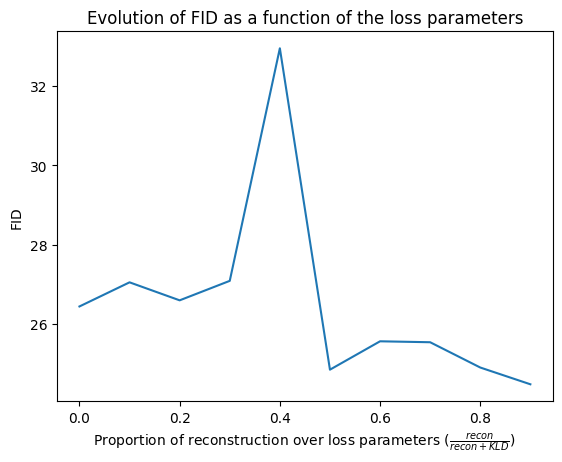

In [71]:
from collections import OrderedDict
od = OrderedDict(sorted(dic_FID.items()))
plt.plot(np.array([k for k in range(10)])/10,od.values())
# _=plt.xticks()
plt.ylabel("FID")
plt.xlabel(r"Proportion of reconstruction over loss parameters ($\frac{recon}{recon + KLD}$) ")

plt.title("Evolution of FID as a function of the loss parameters")
# plt.savefig("../images/Evolution of FID as a function of the loss parameters.png")